In [ ]:
## PROBLEM 2

In [12]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as ss

import warnings
warnings.filterwarnings('ignore')

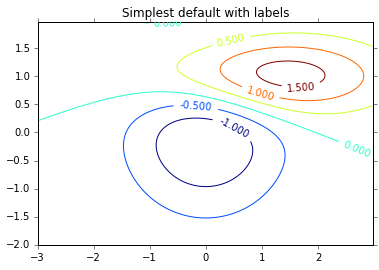

In [2]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')

plt.show()

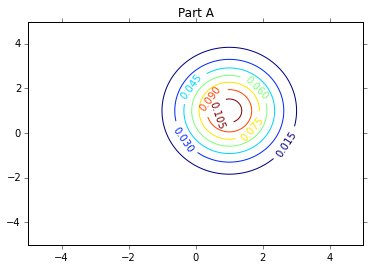

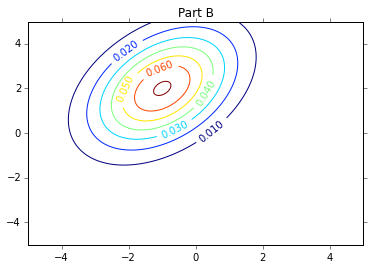

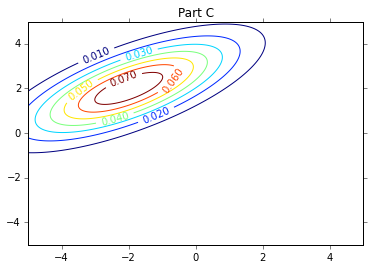

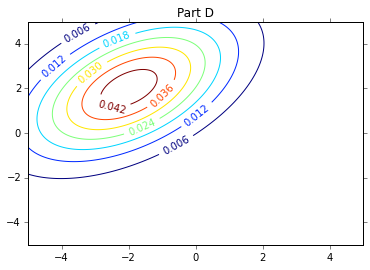

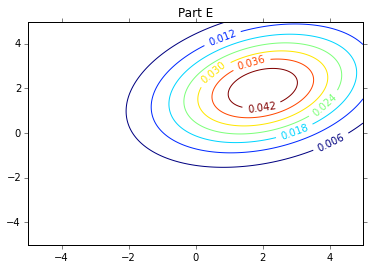

In [25]:
x, y = np.mgrid[-5:5:.01, -5:5:.01]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y

plt.figure()
rv = ss.multivariate_normal([1, 1], [[1.0, 0.0], [0.0, 2.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part A')

plt.figure()
rv = ss.multivariate_normal([-1, 2], [[2.0, 1.0], [1.0, 3.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part B')

plt.figure()
rv = ss.multivariate_normal([-2, 2], [[4.0, 2.0], [2.0, 2.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part C')

plt.figure()
rv = ss.multivariate_normal([-2, 2], [[4.0, 2.0], [2.0, 4.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part D')

plt.figure()
rv = ss.multivariate_normal([2, 2], [[4.0, 1.0], [1.0, 3.0]])
CS = plt.contour(x, y, rv.pdf(pos))
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Part E')

## PROBLEM 3

In [3]:
import numpy as np

In [6]:
n = 100
x1 = []
x2 = []
for i in range(n):
    n39 = np.random.normal(3,3)
    x1.append(n39)
    n44 = np.random.normal(4,2)
    x2.append(0.5 * n39 + n44)

In [8]:
# Part a: calculating the mean
mean = np.array([np.average(x1), np.average(x2)])
print(mean[0])
print(mean[1])

3.1971394152
5.74823449517


In [9]:
#Part b: calculating the covariance matrix
covX = np.cov(x1, x2)
print(covX)

[[ 8.55103267  4.10882479]
 [ 4.10882479  6.56684521]]


In [10]:
#Part c: eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covX)
print(eigenvalues)
print(eigenvectors)
#for i in range(len(eigenvalues)):
    #print("Eigenvalue: " + eigenvalues[i] + ", eigenvector: " + eigenvectors[i])

[ 11.78583983   3.33203805]
[[ 0.78571925 -0.61858327]
 [ 0.61858327  0.78571925]]


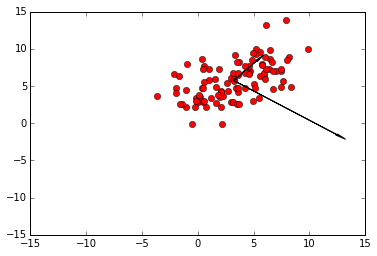

In [13]:
import matplotlib.pyplot as plt
plt.plot(x1, x2, 'ro', zorder=0)
plt.axis([-15, 15, -15, 15])

ax = plt.axes()
ax.arrow(mean[0], mean[1], 
         eigenvectors[0][0]*eigenvalues[0], 
         eigenvectors[0][1]*eigenvalues[0], head_width=0.2, 
         head_length=1, fc='k', ec='k')
ax.arrow(mean[0], mean[1], 
         eigenvectors[1][0]*eigenvalues[1], 
         eigenvectors[1][1]*eigenvalues[1], head_width=0.2, 
         head_length=1, fc='k', ec='k')

plt.show()

[[ 0.78571925  0.61858327]
 [-0.61858327  0.78571925]]


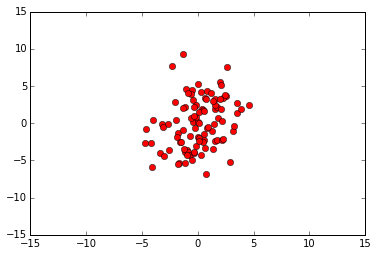

In [14]:
u = np.array([[eigenvectors[0][0], eigenvectors[1][0]],[eigenvectors[0][1], eigenvectors[1][1]]])
print(u)

r1 = []
r2 = []
for i in range(len(x1)):
    x = np.array([x1[i], x2[i]])
    xOrigin = x - mean
    transformed = np.dot(u.T, xOrigin)
    r1.append(transformed[0])
    r2.append(transformed[1])
    
plt.plot(r1, r2, 'ro', zorder=0)
plt.axis([-15, 15, -15, 15])
plt.show()

# PROBLEM 6

In [4]:
import scipy
import scipy.io
import math
import sklearn.preprocessing

import warnings
warnings.filterwarnings('ignore')

from random import shuffle

In [4]:
mnist = scipy.io.loadmat("./hw3_mnist_dist/train")
#print(mnist["trainX"])
indices = [[] for i in range(10)]
for i in range(len(mnist["trainX"])):
    data = mnist["trainX"][i]
    label = data[len(data) - 1]
    indices[label].append(i)

In [11]:
means = []

trainLens = [10,20,50,100,200,500,1000,3000]    

def trainWithNumSamples(trainLen):
    means = []
    for digitIndex in range(10):
        shuffle(indices[digitIndex])
        indicesOfDigits = indices[digitIndex][0:trainLen]
        vectorLen = len(mnist["trainX"][0]) - 1
        mean = np.zeros((vectorLen,1))

        #print(mean.shape)
        #example = np.array([mnist["trainX"][index][0:vectorLen]])
        #print(example.shape)

        for index in indicesOfDigits:
            data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
            data = sklearn.preprocessing.normalize(data)
            mean = np.add(mean, data)

        mean = np.multiply(mean, 1.0/float(trainLen))
        means.append(mean)
    return means

In [23]:


def l2norm(arr, begin, end):
    total = 0
    for i in range(begin, end, 1):
        total += float(arr[i]*arr[i])
    return math.sqrt(total)
    
    #norm = l2norm(data, 0, len(data) - 1)
    #mnist["trainX"][i] = np.multiply(data, 1.0/float(norm))
    
#data = np.array([1,2,3,4,5])
#norm = l2norm(data, 0, 5)
#datascaled = np.multiply(data, 1/float(norm))
#print(datascaled)

#print(indices[5])
    
trainLens = [10,20,50,100,200,500,1000,3000]    
    
def covWithNumSamples(trainLen):
    covs = []
    for digitIndex in range(0,10):
        #print("Calculating covariance for " + str(digitIndex))
        indicesOfDigits = indices[digitIndex][0:trainLen]
        vectorLen = len(mnist["trainX"][0]) - 1

        cov = np.zeros((784, 784))
        mean = means[digitIndex]

        for index in indicesOfDigits:
            data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
            data = sklearn.preprocessing.normalize(data)

            deviation = np.subtract(data, mean)
            entry = np.dot(deviation, np.transpose(deviation))
            cov = np.add(cov, entry)

        cov = np.multiply(cov, 1.0/float(len(indicesOfDigits)))

        covs.append(cov)
    return covs
    

In [29]:
for trainLen in trainLens:
    means = trainWithNumSamples(trainLen)
    covs = covWithNumSamples(trainLen)

    vectorLen = len(mnist["trainX"][0]) - 1    
    avgCov = np.zeros((784, 784))
    for i in range(10):
        avgCov = np.add(avgCov, covs[i])
    np.multiply(avgCov, 0.1)
    for i in range(784):
        avgCov[i][i] += 0.0000001
    covinv = np.linalg.inv(avgCov)

    print("Accuracy for train len: " + str(trainLen))
    print("LDA: " + str(testLdaAccuracy()))
    print("QDA: " + str(testQdaAccuracy()))
    


Accuracy for train len: 10
LDA: 0.532
QDA: 0.576
Accuracy for train len: 20
LDA: 0.551
QDA: 0.548
Accuracy for train len: 50
LDA: 0.313
QDA: 0.552
Accuracy for train len: 100
LDA: 0.639
QDA: 0.612
Accuracy for train len: 200
LDA: 0.734
QDA: 0.62
Accuracy for train len: 500
LDA: 0.8
QDA: 0.556
Accuracy for train len: 1000
LDA: 0.808
QDA: 0.584
Accuracy for train len: 3000
LDA: 0.8
QDA: 0.528


In [17]:
xData = [100,200,500,1000,2000,5000,10000,30000]
yData = [0.532,0.551,0.313,0.639,0.734,0.8,0.808,0.8]
plt.plot(xData, yData, 'b-')

xData = [100,200,500,1000,2000,5000,10000,30000]
yData = [0.576,0.548,0.552,0.612,0.62,0.556,0.584,0.528]
plt.plot(xData, yData, 'r-')

plt.axis([0, 10000, 0, 1])
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.show()

In [30]:
means = trainWithNumSamples(20000)
covs = covWithNumSamples(20000)

vectorLen = len(mnist["trainX"][0]) - 1    
avgCov = np.zeros((784, 784))
for i in range(10):
    avgCov = np.add(avgCov, covs[i])
np.multiply(avgCov, 0.1)
for i in range(784):
    avgCov[i][i] += 0.0000001
covinv = np.linalg.inv(avgCov)

print("Accuracy for train len: " + str(trainLen))
print("LDA: " + str(testLdaAccuracy()))
#print("QDA: " + str(testQdaAccuracy()))

Accuracy for train len: 3000
LDA: 0.822


In [39]:
mnistTest = scipy.io.loadmat("./hw3_mnist_dist/test.mat")
results = []

i = 0
for data in mnistTest["testX"]:
    data = np.transpose([data])
    data = sklearn.preprocessing.normalize(data)
    max_lda = 0
    max_index = -1
    for digit in range(10):
        mean_c = means[digit]
        pi_c = 0.1
        left = np.dot(np.transpose(mean_c), np.dot(covinv, data))
        middle = np.dot(np.transpose(mean_c), np.dot(covinv, mean_c))
        right = np.log(pi_c)
        score = left - 0.5*middle + right
        score = score[0][0]
        if score > max_lda or max_index == -1:
            max_index = digit
            max_lda = score
            #print("Set: " + str(max_index) + " " + str(max_lda))
    #print("Data Index: " + str(index) + ", Predicted Class: " + str(max_index))
    #print("Actual Class: " + str(mnist["trainX"][index][-1]))
    #actual_index = str(mnist["trainX"][index][-1])
    #if (str(max_index) == str(actual_index)):
        #successes += 1
    results.append([i, max_index])
    i = i + 1
    
temp = np.asarray(results)
#temp.tofile("./submission.py")
np.savetxt("submission_mnist.csv", temp, fmt="%i,%i", delimiter=",", header="Id,Category")

In [9]:
# %store covs >> covariance.txt # >:(

In [8]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

# plotting the correlation matrix
R = corrcoef(covs[0])
pcolor(R)
colorbar()
plt.clim(-1,1)
yticks(arange(0,784,56),range(0,784,56))
xticks(arange(0,784,56),range(0,784,56))
show()

In [13]:
#print(covs[0][133][580])
#print(covs[0][580][133])

from random import shuffle

#for i in range(784):
    #print(covs[0][i][i])
vectorLen = len(mnist["trainX"][0]) - 1    
    
avgCov = np.zeros((784, 784))
for i in range(10):
    avgCov = np.add(avgCov, covs[i])
np.multiply(avgCov, 0.1)

#avgCov += 1
for i in range(784):
    avgCov[i][i] += 0.0000001
    
covinv = np.linalg.inv(avgCov)
        

In [24]:
def testLdaAccuracy():
    randomIndices = [i for i in range(0,len(mnist["trainX"]))]
    shuffle(randomIndices)
    randomIndices = randomIndices[0:1000]

    successes = 0.0
    for index in randomIndices:
        data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
        data = sklearn.preprocessing.normalize(data)
        max_lda = 0
        max_index = -1
        for digit in range(10):
            mean_c = means[digit]
            pi_c = len(indices[digit]) / len(mnist["trainX"])
            left = np.dot(np.transpose(mean_c), np.dot(covinv, data))
            middle = np.dot(np.transpose(mean_c), np.dot(covinv, mean_c))
            right = np.log(pi_c)
            score = left - 0.5*middle + right
            score = score[0][0]
            if score > max_lda or max_index == -1:
                max_index = digit
                max_lda = score
                #print("Set: " + str(max_index) + " " + str(max_lda))
        #print("Data Index: " + str(index) + ", Predicted Class: " + str(max_index))
        #print("Actual Class: " + str(mnist["trainX"][index][-1]))
        actual_index = str(mnist["trainX"][index][-1])
        if (str(max_index) == str(actual_index)):
            successes += 1

    accuracy = successes / float(len(randomIndices))
    #print(accuracy)
    return accuracy

In [27]:
storedCov = [0 for _ in range(10)]
storedCovinv = [0 for _ in range(10)]
storedDet = [0 for _ in range(10)]

for digit in range(10):
    cov = np.copy(covs[digit])
    for i in range(784):
        cov[i][i] += 0.0001
    covinv = np.linalg.inv(cov)

    storedCov[digit] = cov
    storedCovinv[digit] = covinv
    storedDet[digit] = np.linalg.det(storedCov[digit])

def testQdaAccuracy():
    randomIndices = [i for i in range(0,len(mnist["trainX"]))]
    shuffle(randomIndices)
    randomIndices = randomIndices[0:250]

    successes = 0.0
    for index in randomIndices:
        data = np.transpose(np.array([mnist["trainX"][index][0:vectorLen]]))
        data = sklearn.preprocessing.normalize(data)
        max_qda = 0
        max_index = -1
        for digit in range(10):
            #cov = covs[digit]
            deviation = np.subtract(data, means[digit])
            #det = np.linalg.det(storedCov[digit])
            #print("Det: " + str(det))
            pi_c = float(len(indices[digit])) / float(len(mnist["trainX"]))

            left = -0.5 * np.dot(np.transpose(deviation), np.dot(storedCovinv[digit], deviation))
            middle = -0.5 * storedDet[digit]
            right = np.log(pi_c)

            score = left + middle + right
            #print(str(left) + " " + str(middle) + " " + str(right))
            if score > max_qda or max_index == -1:
                max_index = digit
                max_qda = score

                #print("Set: " + str(max_index) + " " + str(max_qda))
        actual_index = str(mnist["trainX"][index][-1])
        if (str(max_index) == str(actual_index)):
            successes += 1

    accuracy = successes / float(len(randomIndices))
    return accuracy

In [19]:
spamTest = scipy.io.loadmat("./hw3_spam_dist/spam_data.mat")
print(spamTest)

spamIndices = [[] for i in range(10)]
for i in range(len(spamTest["training_data"])):
    #data = mnist["training_data"][i]
    label = spamTest["training_labels"][0][i]
    spamIndices[label].append(i)

{'__version__': '1.0', 'test_data': array([[ 0.,  0.,  0., ...,  6.,  0.,  2.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  4., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Feb 13 17:55:22 2017', 'training_labels': array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64), 'training_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]]), '__globals__': []}


In [20]:
def meanSpamSamples(trainLen):
    means = []
    for digitIndex in range(2):
        shuffle(spamIndices[digitIndex])
        indicesOfDigits = spamIndices[digitIndex][0:trainLen]
        vectorLen = len(spamTest["training_data"][0])
        mean = np.zeros((vectorLen,1))

        #print(mean.shape)
        #example = np.array([mnist["trainX"][index][0:vectorLen]])
        #print(example.shape)

        for index in indicesOfDigits:
            data = np.transpose(np.array([spamTest["training_data"][index][0:vectorLen]]))
            data = sklearn.preprocessing.normalize(data)
            mean = np.add(mean, data)

        mean = np.multiply(mean, 1.0/float(trainLen))
        means.append(mean)
    return means

#spamMeans = meanSpamSamples(10000)
#print(spamMeans[0])

In [23]:
def covWithSpamSamples(trainLen):
    covs = []
    for digitIndex in range(2):
        #print("Calculating covariance for " + str(digitIndex))
        indicesOfDigits = spamIndices[digitIndex][0:trainLen]
        vectorLen = len(spamTest["training_data"][0])

        cov = np.zeros((32, 32))
        mean = spamMeans[digitIndex]

        for index in indicesOfDigits:
            data = np.transpose(np.array([spamTest["training_data"][index][0:vectorLen]]))
            data = sklearn.preprocessing.normalize(data)

            deviation = np.subtract(data, mean)
            entry = np.dot(deviation, np.transpose(deviation))
            cov = np.add(cov, entry)

        cov = np.multiply(cov, 1.0/float(len(indicesOfDigits)))

        covs.append(cov)
    return covs

In [24]:
from numpy import corrcoef, sum, log, arange
from numpy.random import rand
from pylab import pcolor, show, colorbar, xticks, yticks

# plotting the correlation matrix
R = corrcoef(spamCovs[0])
pcolor(R)
colorbar()
plt.clim(-1,1)
yticks(arange(0,32,4),range(0,32,4))
xticks(arange(0,32,4),range(0,32,4))
show()

In [37]:
spamMeans = meanSpamSamples(10000)
spamCovs = covWithSpamSamples(10000)

from random import shuffle

#for i in range(784):
    #print(covs[0][i][i])
vectorLen = len(spamTest["training_data"][0])   
    
avgCov = np.zeros((32, 32))
for i in range(2):
    avgCov = np.add(avgCov, spamCovs[i])
np.multiply(avgCov, 0.5)

#avgCov += 1
for i in range(32):
    avgCov[i][i] += 0.0000001
    
covinv = np.linalg.inv(avgCov)

In [38]:
def testSpamLdaAccuracy():
    randomIndices = [i for i in range(0,len(spamTest["training_data"]))]
    shuffle(randomIndices)
    randomIndices = randomIndices[0:1000]

    successes = 0.0
    for index in randomIndices:
        data = np.transpose(np.array([spamTest["training_data"][index][0:]]))
        data = sklearn.preprocessing.normalize(data)
        max_lda = 0
        max_index = -1
        for digit in range(2):
            mean_c = spamMeans[digit]
            pi_c = len(spamIndices[digit]) / len(spamTest["training_data"])
            left = np.dot(np.transpose(mean_c), np.dot(covinv, data))
            middle = np.dot(np.transpose(mean_c), np.dot(covinv, mean_c))
            right = np.log(pi_c)
            score = left - 0.5*middle + right
            score = score[0][0]
            if score > max_lda or max_index == -1:
                max_index = digit
                max_lda = score
                #print("Set: " + str(max_index) + " " + str(max_lda))
        #print("Data Index: " + str(index) + ", Predicted Class: " + str(max_index))
        #print("Actual Class: " + str(mnist["trainX"][index][-1]))
        actual_index = str(spamTest["training_labels"][0][index])
        if (str(max_index) == str(actual_index)):
            successes += 1

    accuracy = successes / float(len(randomIndices))
    #print(accuracy)
    return accuracy

testSpamLdaAccuracy()

0.773

In [40]:
mnistTest = scipy.io.loadmat("./hw3_mnist_dist/test.mat")
results = []

i = 0
for data in spamTest["test_data"]:
    data = np.transpose([data])
    data = sklearn.preprocessing.normalize(data)
    max_lda = 0
    max_index = -1
    for digit in range(2):
        mean_c = spamMeans[digit]
        pi_c = 0.1
        left = np.dot(np.transpose(mean_c), np.dot(covinv, data))
        middle = np.dot(np.transpose(mean_c), np.dot(covinv, mean_c))
        right = np.log(pi_c)
        score = left - 0.5*middle + right
        score = score[0][0]
        if score > max_lda or max_index == -1:
            max_index = digit
            max_lda = score
            #print("Set: " + str(max_index) + " " + str(max_lda))
    #print("Data Index: " + str(index) + ", Predicted Class: " + str(max_index))
    #print("Actual Class: " + str(mnist["trainX"][index][-1]))
    #actual_index = str(mnist["trainX"][index][-1])
    #if (str(max_index) == str(actual_index)):
        #successes += 1
    results.append([i, max_index])
    i = i + 1
    
temp = np.asarray(results)
#temp.tofile("./submission.py")
np.savetxt("submission_spam.csv", temp, fmt="%i,%i", delimiter=",", header="Id,Category")